# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime as dt, timedelta
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/home/serena/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

In [2]:
def overview_dataset(dataset):
    
    df_overview_after = pd.DataFrame(index=dataset.columns)
    df_overview_after['NaValues'] = dataset.isna().any()
    df_overview_after['dtypes'] = dataset.dtypes
    df_overview_after['UniqueValues'] = dataset.nunique()
    df_overview_after['RecordNumber'] = dataset.count()
    df_overview_after['Median'] = dataset.median()
    df_overview_after['Mean'] = dataset.mean()
    df_overview_after['Standard Deviation'] = dataset.std()
    df_overview_after['25%'] = dataset.quantile(0.25, numeric_only=True)
    df_overview_after['75%'] = dataset.quantile(0.75, numeric_only=True)
    df_overview_after['Min'] = dataset.min(axis=0)
    df_overview_after['Max'] = dataset.max(axis=0)
    

    return df_overview_after

In [3]:
#Read the file and create dataset
filepath = 'income_evaluation.csv'
dataset = pd.read_csv(filepath, encoding='ISO_8859-1')

#trim whitespace from al columns
df_obj = dataset.select_dtypes(['object'])
dataset[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
pre_dataset = overview_dataset(dataset)
pre_dataset


,NaValues,dtypes,UniqueValues,RecordNumber,Median,Mean,Standard Deviation,25%,75%,Min,Max
age,False,int64,73,32561,37.0,38.581647,13.640433,28.0,48.0,17,90
workclass,False,object,9,32561,NaN,NaN,NaN,NaN,NaN,?,Without-pay
fnlwgt,False,int64,21648,32561,178356.0,189778.366512,105549.977697,117827.0,237051.0,12285,1484705
education,False,object,16,32561,NaN,NaN,NaN,NaN,NaN,10th,Some-college
education-num,False,int64,16,32561,10.0,10.080679,2.572720,9.0,12.0,1,16
marital-status,False,object,7,32561,NaN,NaN,NaN,NaN,NaN,Divorced,Widowed
occupation,False,object,15,32561,NaN,NaN,NaN,NaN,NaN,?,Transport-moving
relationship,False,object,6,32561,NaN,NaN,NaN,NaN,NaN,Husband,Wife
race,False,object,5,32561,NaN,NaN,NaN,NaN,NaN,Amer-Indian-Eskimo,White
sex,False,object,2,32561,NaN,NaN,NaN,NaN,NaN,Female,Male


In [4]:
#Finding and deleting all unknown values

occupation = int(dataset.occupation[dataset.loc[dataset.occupation == '?'].index].count())
workclass = int(dataset.workclass[dataset.loc[dataset.workclass == '?'].index].count())
country = int(dataset['native-country'][dataset.loc[dataset['native-country'] == '?'].index].count())

print("Droping " + str(occupation) + " records from occupation column")
print("Droping " + str(workclass) + " records from workclass column")
print("Droping " + str(country) + " records from native-country column")
before = dataset.shape[0]

#drop the records that have a question mark (?) on one of the columns
dataset.drop(dataset.loc[dataset['native-country'] == '?'].index,inplace=True)
dataset.drop(dataset.loc[dataset['workclass'] == '?'].index,inplace=True)
dataset.drop(dataset.loc[dataset['occupation'] == '?'].index,inplace=True)


post_dataset = overview_dataset(dataset) 
after = dataset.shape[0]
print("Dropped about " + str(round(100 * (before-after)/before,2)) + "% of the records of the dataset")
post_dataset

Droping 1843 records from occupation column
Droping 1836 records from workclass column
Droping 583 records from native-country column
Dropped about 7.37% of the records of the dataset


,NaValues,dtypes,UniqueValues,RecordNumber,Median,Mean,Standard Deviation,25%,75%,Min,Max
age,False,int64,72,30162,37.0,38.437902,13.134665,28.00,47.0,17,90
workclass,False,object,7,30162,NaN,NaN,NaN,NaN,NaN,Federal-gov,Without-pay
fnlwgt,False,int64,20263,30162,178425.0,189793.833930,105652.971529,117627.25,237628.5,13769,1484705
education,False,object,16,30162,NaN,NaN,NaN,NaN,NaN,10th,Some-college
education-num,False,int64,16,30162,10.0,10.121312,2.549995,9.00,13.0,1,16
marital-status,False,object,7,30162,NaN,NaN,NaN,NaN,NaN,Divorced,Widowed
occupation,False,object,14,30162,NaN,NaN,NaN,NaN,NaN,Adm-clerical,Transport-moving
relationship,False,object,6,30162,NaN,NaN,NaN,NaN,NaN,Husband,Wife
race,False,object,5,30162,NaN,NaN,NaN,NaN,NaN,Amer-Indian-Eskimo,White
sex,False,object,2,30162,NaN,NaN,NaN,NaN,NaN,Female,Male


# Pandas Profiling

In [5]:
from pandas_profiling import ProfileReport
# dataset = dataset.drop(columns = ['count'])
profile = ProfileReport(dataset, title="Pandas Profiling Report")
profile.to_widgets()


# Data Vizualisation

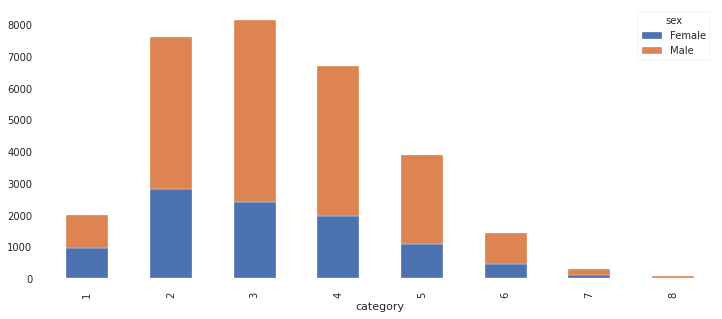

In [6]:
#One-hot encoding sex column
dataframe = dataset.copy()

one_hot = pd.get_dummies(dataframe['sex'])
dataframe = pd.concat([dataframe, one_hot], axis=1)

bins = np.arange(1, 10) * 10
dataframe['category'] = np.digitize(dataframe.age, bins, right=True)
counts = dataframe.groupby(['category', 'sex']).age.count().unstack()
# plt.figure(figsize=(12,5))
counts.plot(kind='bar', stacked=True,figsize=(12, 5))



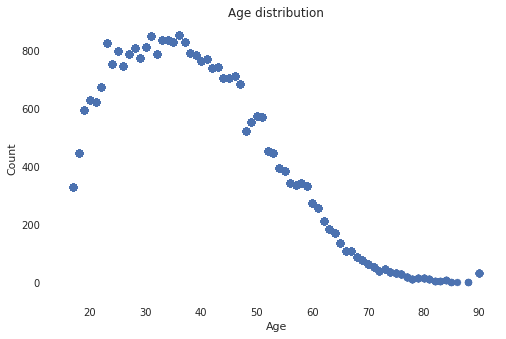

Text(0.5, 1.0, 'Income distributed for different ages')

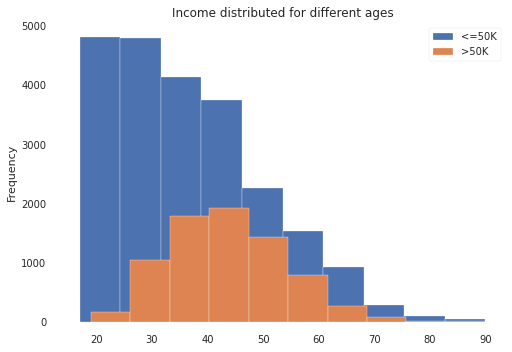

In [7]:
#Age Distribution
age_dt = dataset
age_dt['count'] = dataset.groupby(['age'], as_index=True)['age'].transform('count')


plt.figure(figsize=(8,5))
# plt.scatter(age_dt['age'], age_dt['count'], s=age_dt['count'], alpha=0.5)
plt.scatter(age_dt['age'], age_dt['count'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_dt.groupby('income').age.plot(kind='hist', legend='income')
plt.title('Income distributed for different ages')


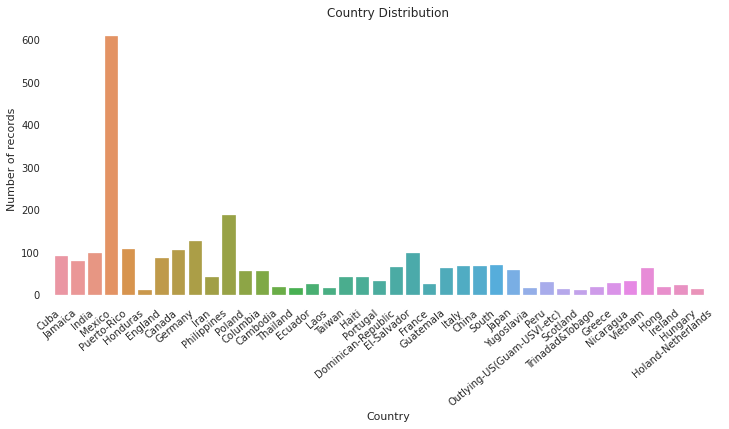

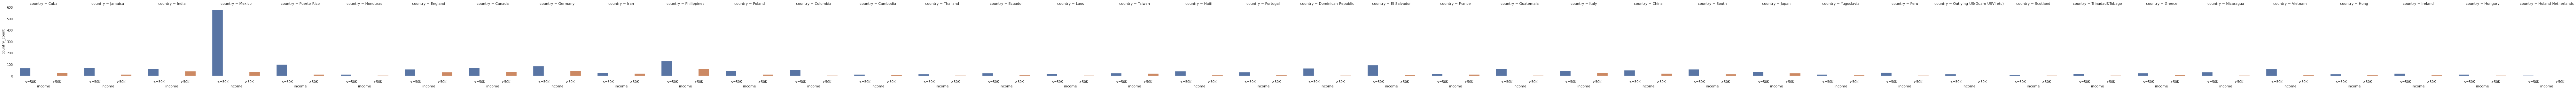

In [8]:
#Country Distribution

country_df = dataset.copy()
country_df = country_df.rename(columns={'native-country':'country'})
country_df['country_count'] = country_df.groupby(['country','income'], as_index=True)['country'].transform('count')
country_df['country'] = country_df['country'].loc[country_df[country_df['country']!='United-States'].index]
plt.figure(figsize=(12,5))
sns.countplot(x=country_df['country'])
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Number of records')

# country_df.groupby('income').country.plot(kind='hist', legend='income')
# plt.title('Income distributed for different countries')

ax = sns.catplot(x="income", y="country_count",
                hue="income", col="country",
                data=country_df, kind="bar",
                height=4, aspect=.7);

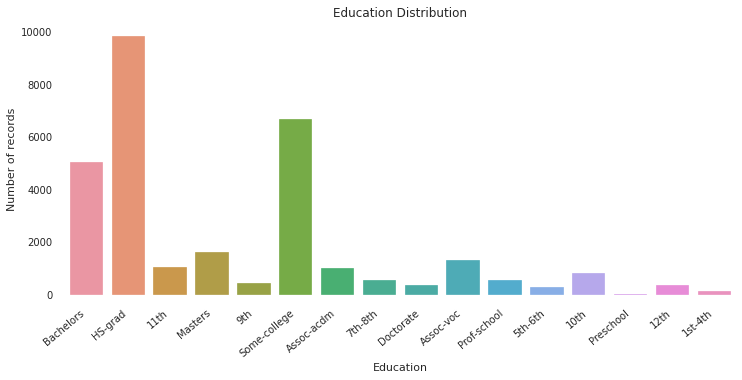

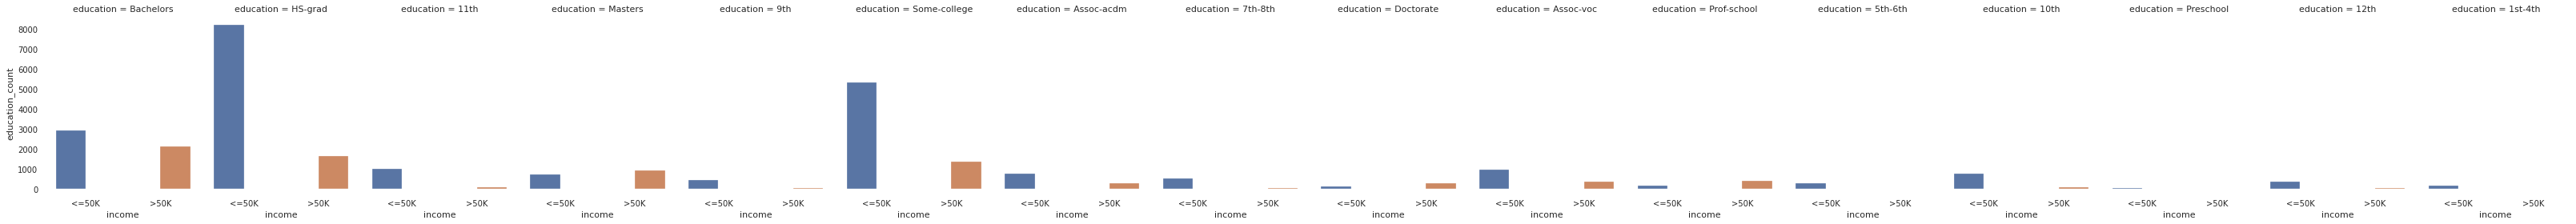

In [9]:
#Education Distribution

education_df = dataset.copy()
education_df['education_count'] = education_df.groupby(['education','income'], as_index=True)['education'].transform('count')

plt.figure(figsize=(12,5))
sns.countplot(x=education_df['education'])
plt.xticks(rotation=40,ha='right')
plt.title("Education Distribution")
plt.xlabel('Education')
plt.ylabel('Number of records')

ax = sns.catplot(x="income", y="education_count",
                hue="income", col="education",
                data=education_df, kind="bar",
                height=4, aspect=.7);

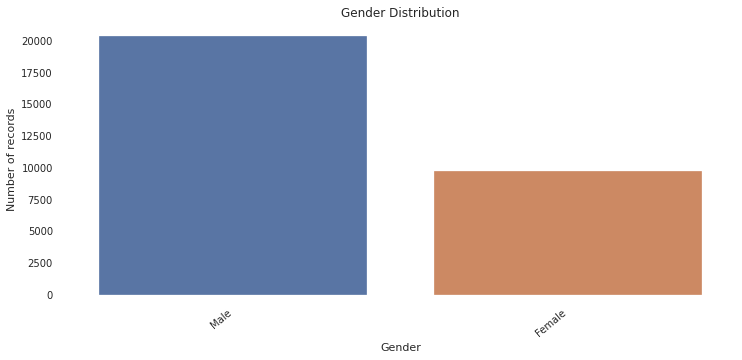

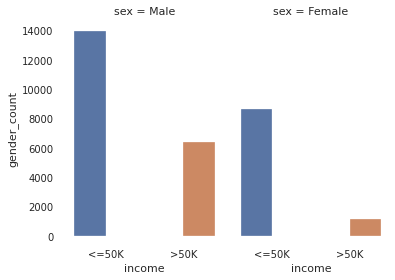

In [10]:
#Gender Distribution

gender_df = dataset.copy()
gender_df['gender_count'] = gender_df.groupby(['sex','income'], as_index=True)['sex'].transform('count')

plt.figure(figsize=(12,5))
sns.countplot(x=gender_df['sex'])
plt.xticks(rotation=40,ha='right')
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Number of records')

ax = sns.catplot(x="income", y="gender_count",
                hue="income", col="sex",
                data=gender_df, kind="bar",
                height=4, aspect=.7);

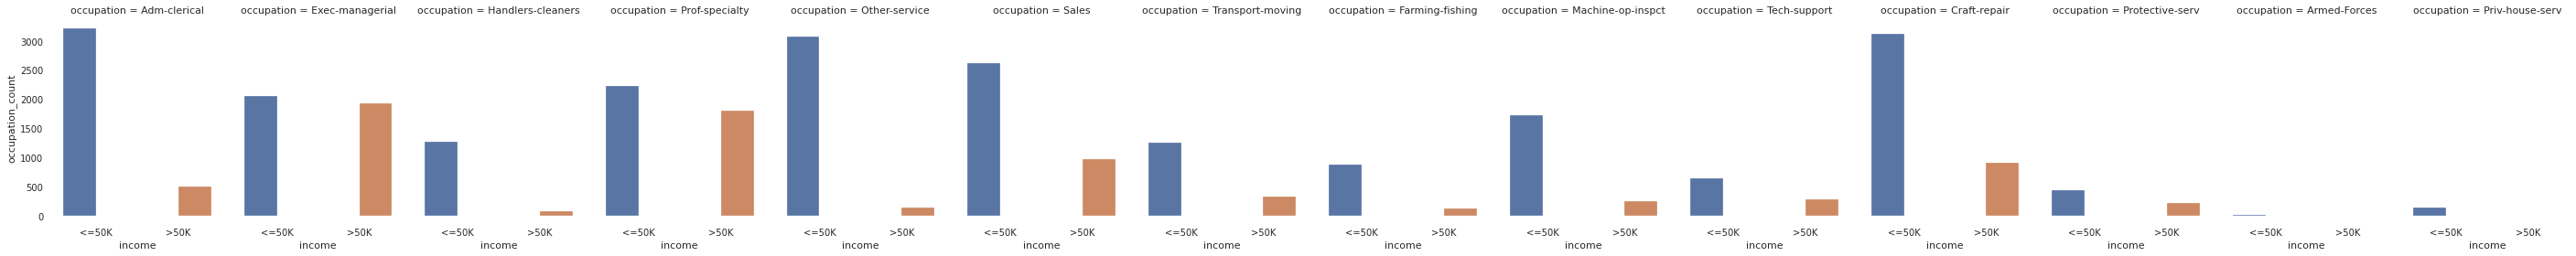

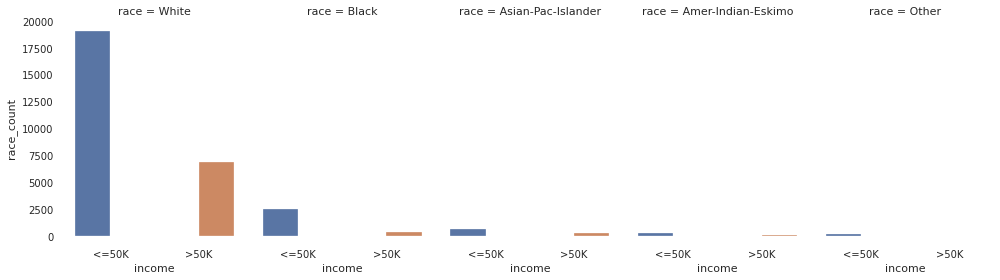

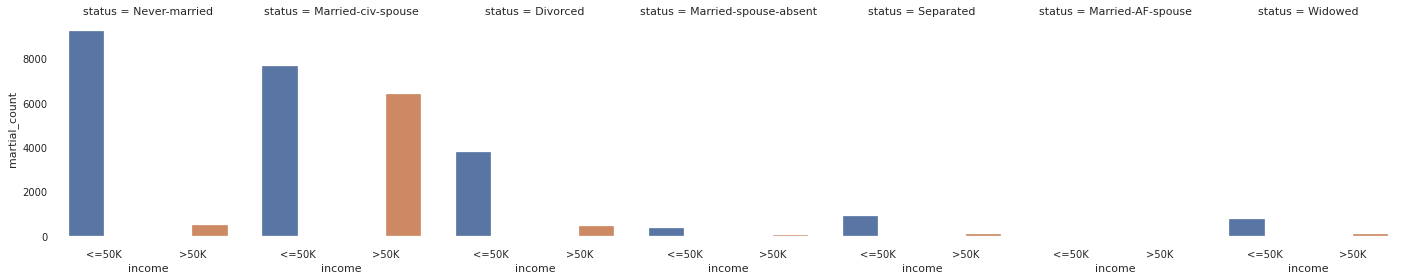

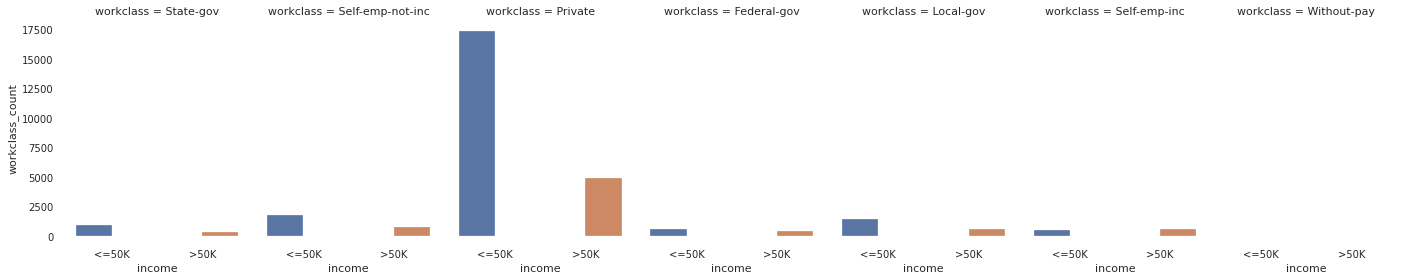

In [11]:
#Occupation, Marital Status, Workclass, Race Distribution

occupation_df = dataset.copy()
occupation_df['occupation_count'] = occupation_df.groupby(['occupation','income'], as_index=True)['occupation'].transform('count')
occupation_df['race_count'] = occupation_df.groupby(['race','income'], as_index=True)['race'].transform('count')
occupation_df = occupation_df.rename(columns={"marital-status":"status"})
occupation_df['martial_count'] = occupation_df.groupby(['status','income'], as_index=True)['status'].transform('count')
occupation_df['workclass_count'] = occupation_df.groupby(['workclass','income'], as_index=True)['workclass'].transform('count')

ax = sns.catplot(x="income", y="occupation_count",
                hue="income", col="occupation",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

ax = sns.catplot(x="income", y="race_count",
                hue="income", col="race",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

ax = sns.catplot(x="income", y="martial_count",
                hue="income", col="status",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

ax = sns.catplot(x="income", y="workclass_count",
                hue="income", col="workclass",
                data=occupation_df, kind="bar",
                height=4, aspect=.7);

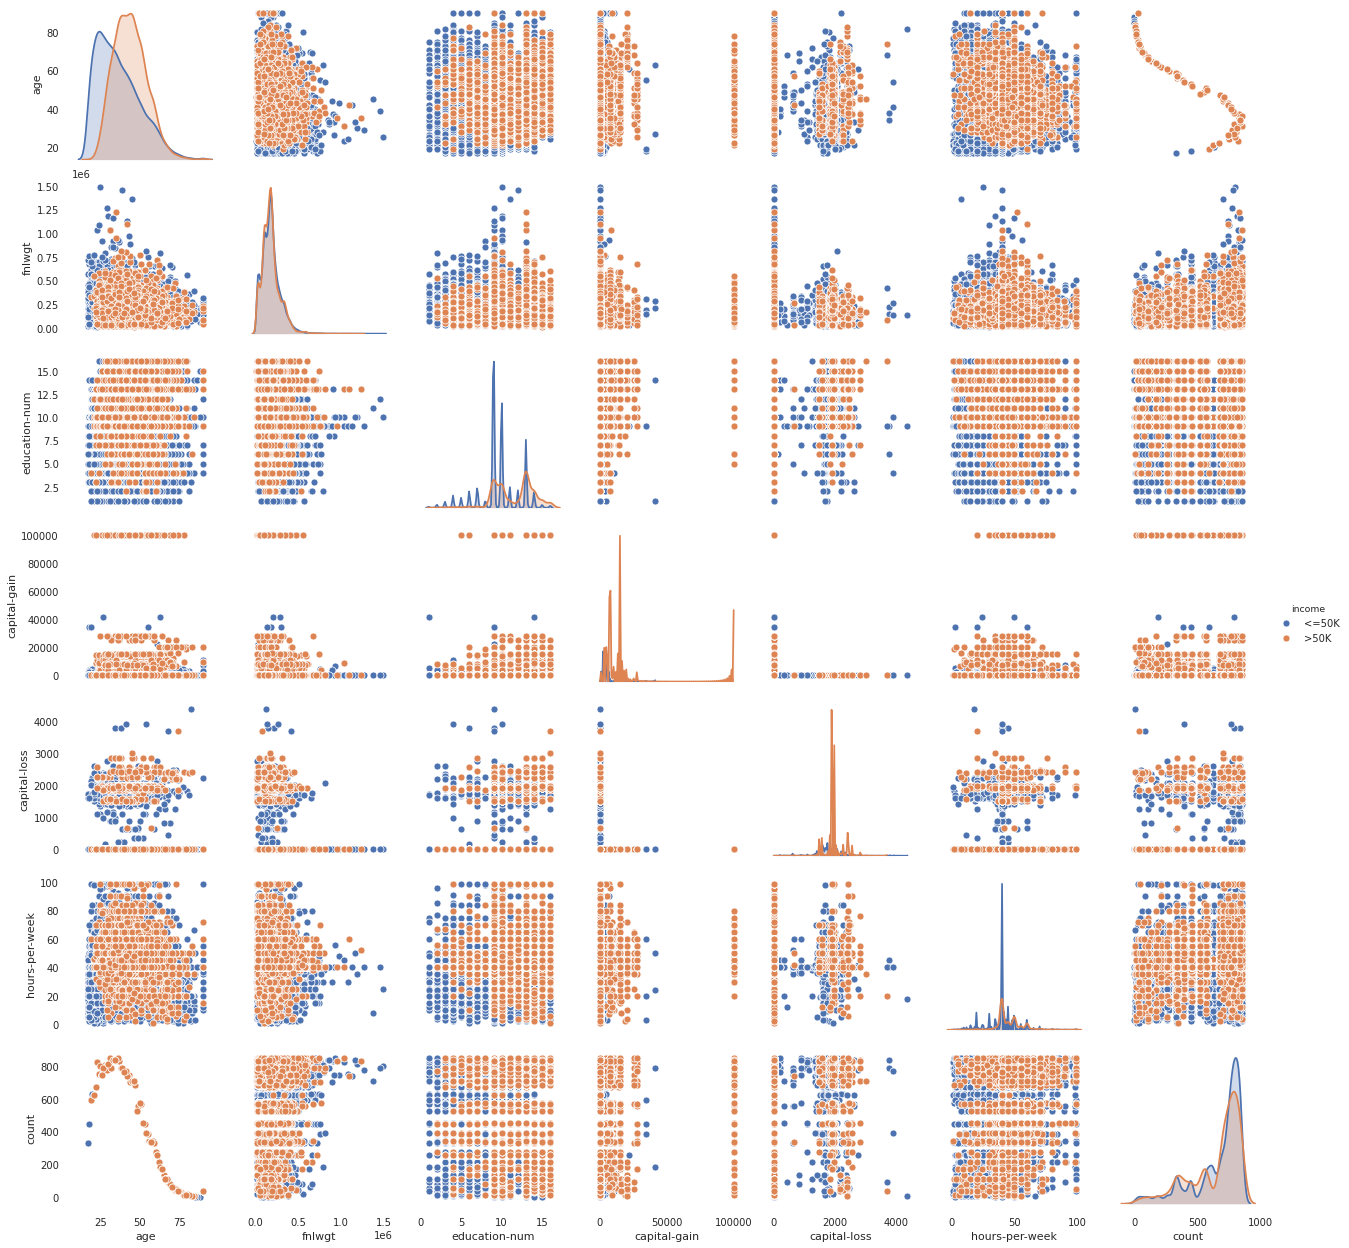

In [12]:
sns.pairplot(dataset, hue="income")

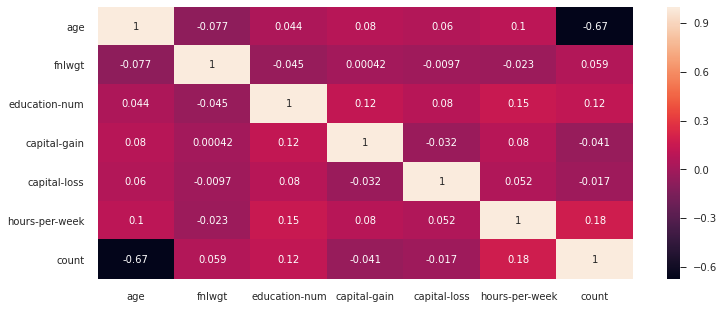

In [13]:
plt.figure(figsize=(12,5))
sns.heatmap(dataset.corr(), annot=True)

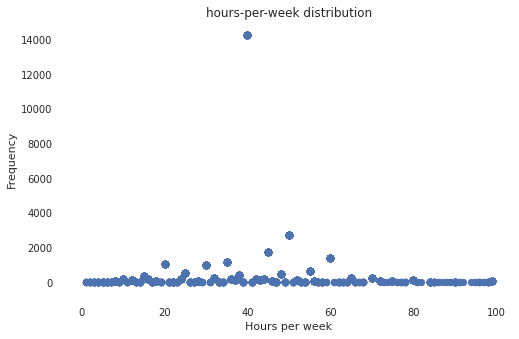

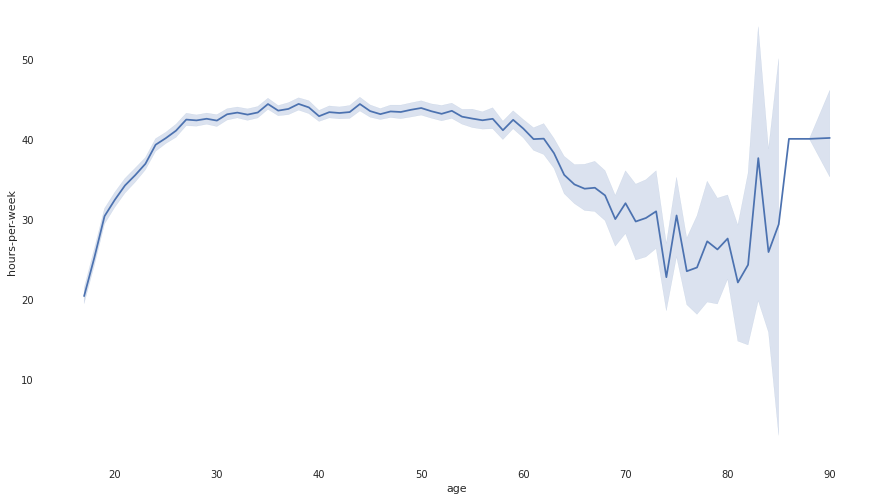

In [14]:
#Hour-age-income

df = dataset.copy()
df['count_hours'] = df.groupby(['hours-per-week'], as_index=True)['hours-per-week'].transform('count')

plt.figure(figsize=(8,5))
plt.scatter(df['hours-per-week'], df['count_hours'])
plt.title('hours-per-week distribution')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.show()

#Hour-age
fig, ax = plt.subplots(figsize=(14.7, 8.27))
sns.lineplot(ax=ax, x="age", y="hours-per-week",data=df)
# df.loc[(df['age']<30) & (df['hours-per-week']>50)]

# fig, ax = plt.subplots(figsize=(12.7, 8.27))
# p1 = sns.relplot(ax=ax, x="age", y="hours-per-week", hue="income", data=dataset);
# plt.close(p1.fig)


(2538, 16)


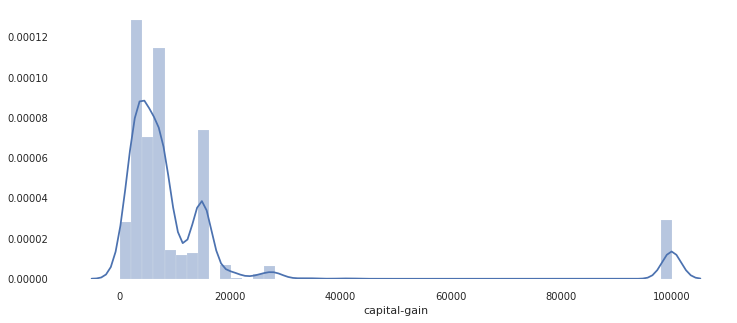

In [15]:
capitalgain_df = dataset.copy()
capitalgain_df.drop(capitalgain_df.loc[capitalgain_df['capital-gain'] == 0].index,inplace=True)
print(capitalgain_df.shape)
plt.figure(figsize=(12,5))
ax = sns.distplot(capitalgain_df['capital-gain'], kde=True);

(1427, 16)


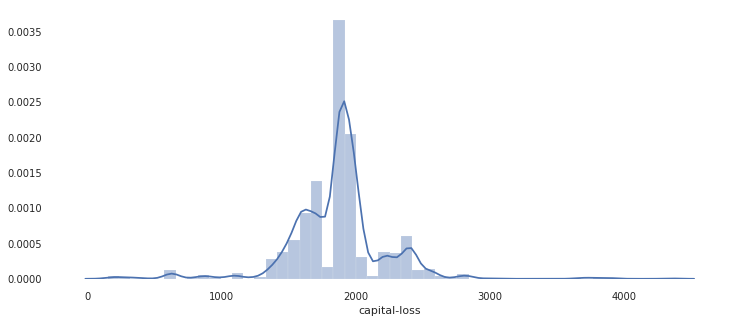

In [16]:
capitalloss_df = dataset.copy()
capitalloss_df.drop(capitalloss_df.loc[capitalloss_df['capital-loss'] == 0].index,inplace=True)
print(capitalloss_df.shape)
plt.figure(figsize=(12,5))
ax = sns.distplot(capitalloss_df['capital-loss'], kde=True);

# Categorical and Numeric Data

In [17]:
#Encode all categorical data with OneHotEncoding
import category_encoders as ce

#education: the highest level of education achieved by an individual and
#education-num: the highest level of education achieved in numerical form.
#drop the education column and we only use the education-num column 
dataframe = dataset.copy()
dataframe = dataframe.drop(['education','count'], axis=1)
encoder = ce.OneHotEncoder(cols=['workclass', 'marital-status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native-country'])
dataframe = encoder.fit_transform(dataframe)



In [18]:
# #Label Encoding for income column
# from sklearn import preprocessing

# label_encoding = preprocessing.LabelEncoder()
# dataframe.income = label_encoding.fit_transform(dataframe.income)


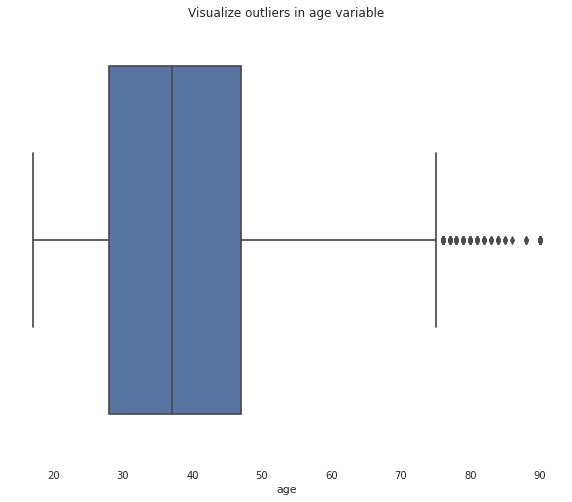

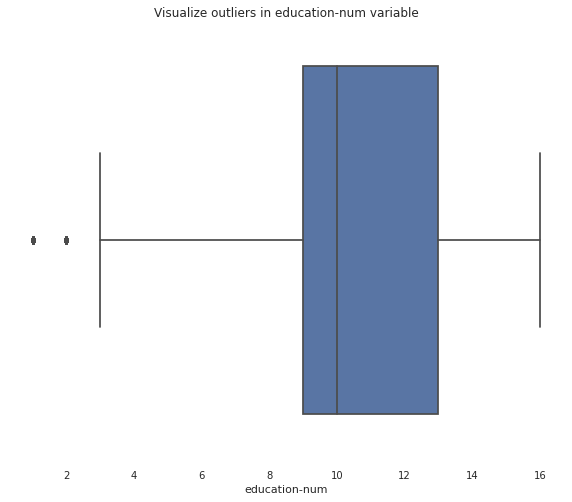

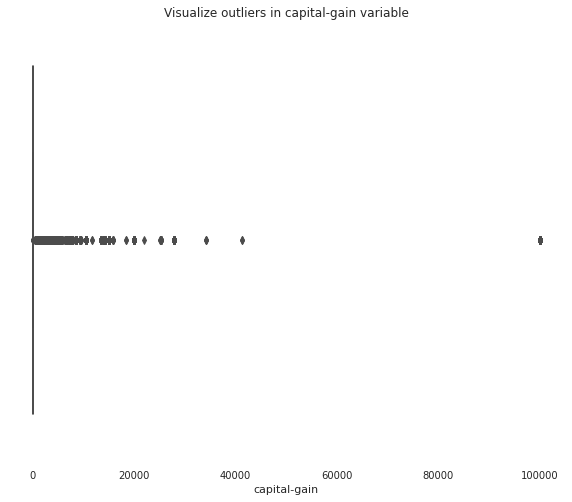

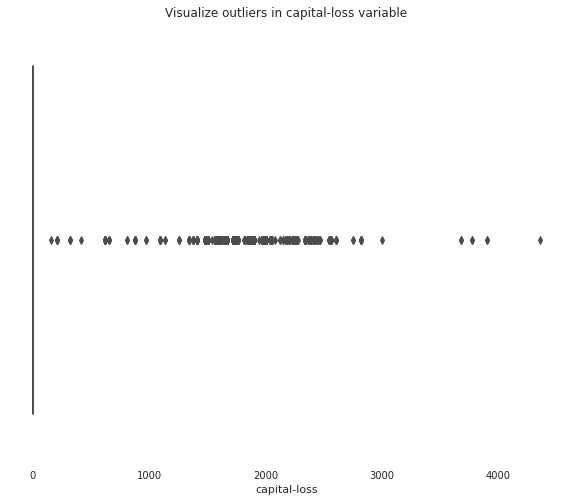

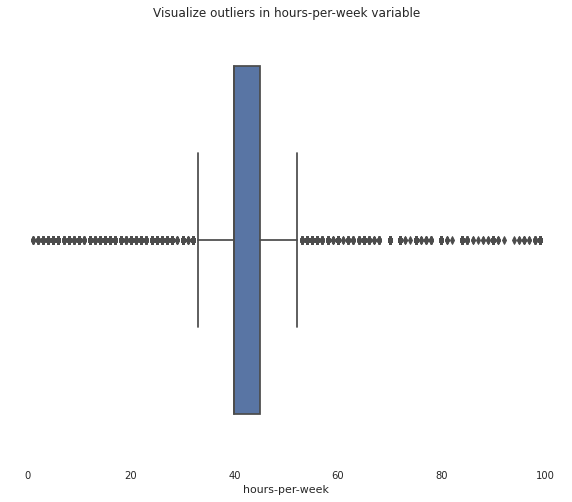

In [19]:
#Outliers

numerical = ['age','education-num','capital-gain','capital-loss','hours-per-week']

for var in numerical:
    f, ax = plt.subplots(figsize=(10,8))
    x = dataset[var]
    ax = sns.boxplot(x)
    ax.set_title("Visualize outliers in " + var + " variable")
    plt.show()
# dataset.loc[dataset['capital-gain'] == 99999]



# Scaling Data

In [20]:
#Split data into training and testing 80-20

from sklearn.model_selection import train_test_split

X = dataframe.drop(['income'], axis = 1)
y = dataframe['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)



#We use RobustScaler if we have outliers and we want to reduce their influence

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
columns = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[columns])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[columns])


# RandomForestClassifier

In [21]:
#SVM Implementation

# from sklearn.svm import LinearSVR

# linsvr = LinearSVR()
# linsvr.fit(X_train, y_train)
# y_pred = linsvr.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))


/home/serena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[4269  328]
 [ 593  843]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4597
        >50K       0.72      0.59      0.65      1436

    accuracy                           0.85      6033
   macro avg       0.80      0.76      0.77      6033
weighted avg       0.84      0.85      0.84      6033



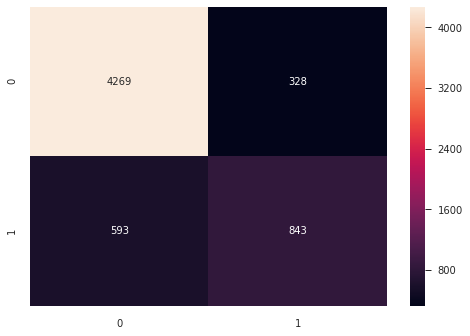

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

#The result of this algorithm is shown using the confusion_matrix where we see that:
#For the first class <=50K:
#There are 4210 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 330 False Negative (FN) : Observation is positive, but is predicted negative.
#For the second class >50K:
#There are 611 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 882 False Negative (FN) : Observation is positive, but is predicted negative.

sns.heatmap(confusion_matrix(y_test,prediction),annot=True, fmt="d")

# Naive Bayes

[[3575 1022]
 [ 267 1169]]
              precision    recall  f1-score   support

       <=50K       0.93      0.78      0.85      4597
        >50K       0.53      0.81      0.64      1436

    accuracy                           0.79      6033
   macro avg       0.73      0.80      0.75      6033
weighted avg       0.84      0.79      0.80      6033



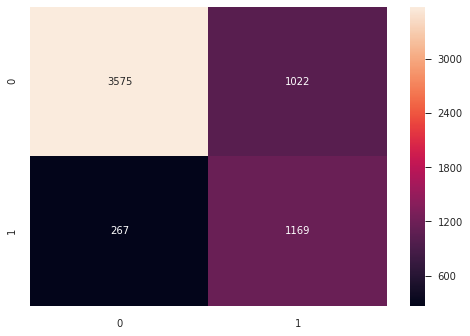

In [23]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
prediction = naive_bayes.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

#The result of this algorithm is shown using the confusion_matrix where we see that:
#For the first class <=50K:
#There are 3530 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 1010 False Negative (FN) : Observation is positive, but is predicted negative.
#For the second class >50K:
#There are 267 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 1226 False Negative (FN) : Observation is positive, but is predicted negative.

sns.heatmap(confusion_matrix(y_test,prediction),annot=True, fmt="d")

# Logistic Regression

/home/serena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.85
[[4241  356]
 [ 563  873]]
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4597
        >50K       0.71      0.61      0.66      1436

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



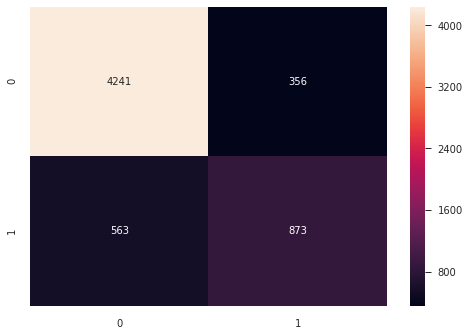

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

#The result of this algorithm is shown using the confusion_matrix where we see that:
#For the first class <=50K:
#There are 4204 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 336 False Negative (FN) : Observation is positive, but is predicted negative.
#For the second class >50K:
#There are 580 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 913 False Negative (FN) : Observation is positive, but is predicted negative.

sns.heatmap(confusion_matrix(y_test,prediction),annot=True, fmt="d")


# Support Vector Machine

Automatically created module for IPython interactive environment


/home/serena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


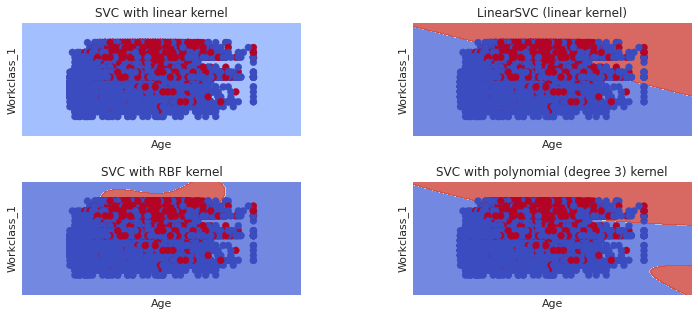

In [62]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import preprocessing

# import some data to play with

data = X_train[['age','education-num','hours-per-week']].copy()
# data
data = data.values
X = data[:, :2]  # we only take the first two features. We could
                 # avoid this ugly slicing by using a two-dim dataset

label_encoding = preprocessing.LabelEncoder()
y_train = label_encoding.fit_transform(y_train)
y = y_train

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(12,5))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('Workclass_1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Accuracy for rbf SVM is  0.8715398640808885
[[4241  356]
 [ 563  873]]
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4597
        >50K       0.71      0.61      0.66      1436

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



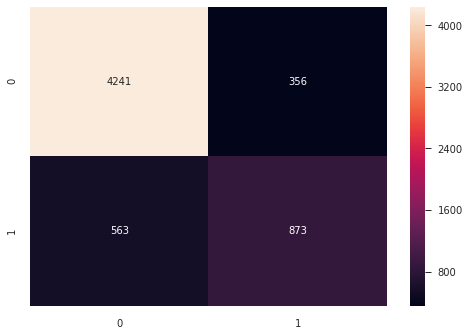

In [60]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf',C=1,gamma=0.1, probability=True)
svm_rbf.fit(X_train,y_train)
prediction1 = svm_rbf.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

#The result of this algorithm is shown using the confusion_matrix where we see that:
#For the first class <=50K:
#There are 4241 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 356 False Negative (FN) : Observation is positive, but is predicted negative.
#For the second class >50K:
#There are 563 True Positive (TP) : Observation is positive, and is predicted to be positive.
#There are 873 False Negative (FN) : Observation is positive, but is predicted negative.

sns.heatmap(confusion_matrix(y_test,prediction),annot=True, fmt="d")


In [27]:
# #Using Grid Search to choose the right kernel for SVM 
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# data = X_train[['age','education-num','hours-per-week']].copy()
# # data
# data = data.values
# label_encoding = preprocessing.LabelEncoder()
# y_train = label_encoding.fit_transform(y_train)
# y = y_train

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf.fit(data, y)
# GridSearchCV(estimator=svc,
#              param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
# sorted(clf.cv_results_.keys())
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',
#  'param_C', 'param_kernel', 'params',
#  'rank_test_score', 'split0_test_score',
#  'split2_test_score',
#  'std_fit_time', 'std_score_time', 'std_test_score']

# Decission Tree

In [28]:
# model=DecisionTreeClassifier()
# model.fit(train_X,train_Y)
# prediction4=model.predict(test_X)XGXGBoostBoost
# print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

# Receiver operating characteristic (ROC)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903
Naive Bayes: ROC AUC=0.883
RandomForestClassifiers: ROC AUC=0.877
SVM RBF: ROC AUC=0.900


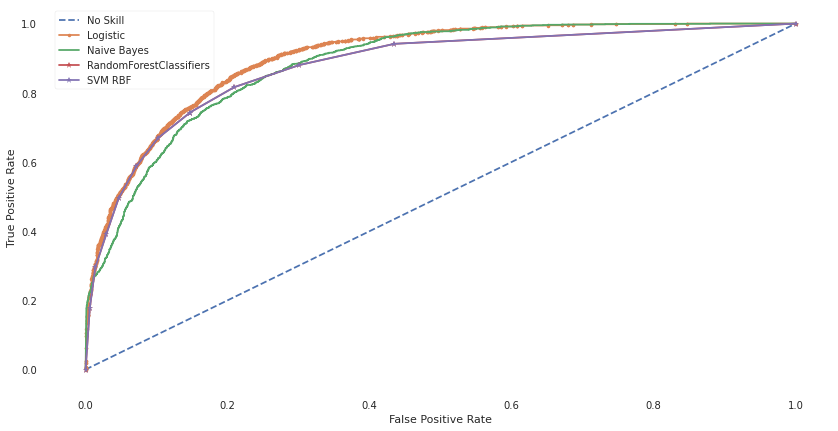

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing


label_encoding = preprocessing.LabelEncoder()
testdata = label_encoding.fit_transform(y_test)

ns_probs = [0 for _ in range(len(testdata))]

lr_probs = logreg.predict_proba(X_test)
nb_probs = naive_bayes.predict_proba(X_test)
rfc_probs = rfc.predict_proba(X_test)
svm_probs = svm_rbf.predict_proba(X_test)


lr_probs = lr_probs[:, 1]
nb_probs = nb_probs[:, 1]
rfc_probs = rfc_probs[:, 1]
svm_probs = svm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testdata, ns_probs)
lr_auc = roc_auc_score(testdata, lr_probs)
nb_auc = roc_auc_score(testdata, nb_probs)
rfc_auc = roc_auc_score(testdata, rfc_probs)
svm_rbf_auc = roc_auc_score(testdata, svm_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('RandomForestClassifiers: ROC AUC=%.3f' % (rfc_auc))
print('SVM RBF: ROC AUC=%.3f' % (svm_rbf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testdata, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testdata, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(testdata, nb_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(testdata, rfc_probs)
svm_fpr, svm_tpr, _ = roc_curve(testdata, svm_probs)

# plot the roc curve for the model
plt.figure(figsize=(14,7))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(nb_fpr, nb_tpr, marker='+', label='Naive Bayes')
plt.plot(rfc_fpr, rfc_tpr, marker='*', label='RandomForestClassifiers')
plt.plot(rfc_fpr, rfc_tpr, marker='*', label='SVM RBF')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()